# 🏦 Task 2: Credit Risk Prediction

## 🎯 Objective
Predict whether a loan applicant is likely to **default** on a loan using machine learning techniques.

## 🧠 Skills You’ll Apply
- ✅ Data cleaning and handling missing values  
- 📊 Exploratory Data Analysis (EDA)  
- 🤖 Binary classification using machine learning  
- 📈 Model evaluation using confusion matrix and accuracy



In [1]:
import pandas as pd
df=pd.read_csv("loan_default.csv") 
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [2]:
print("shape of dataset",df.shape)

shape of dataset (255347, 18)


In [3]:
print("Datatypes",df.dtypes)


Datatypes LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object


In [4]:
print("summary statistics", df.describe)

summary statistics <bound method NDFrame.describe of             LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0       I38PQUQS96   56   85994       50587          520              80   
1       HPSK72WA7R   69   50432      124440          458              15   
2       C1OZ6DPJ8Y   46   84208      129188          451              26   
3       V2KKSFM3UN   32   31713       44799          743               0   
4       EY08JDHTZP   60   20437        9139          633               8   
...            ...  ...     ...         ...          ...             ...   
255342  8C6S86ESGC   19   37979      210682          541             109   
255343  98R4KDHNND   32   51953      189899          511              14   
255344  XQK1UUUNGP   56   84820      208294          597              70   
255345  JAO28CPL4H   42   85109       60575          809              40   
255346  ZTH91CGL0B   62   22418       18481          636             113   

        NumCreditLines  InterestRa

In [7]:
print("missing values", df.isnull().sum())

missing values LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


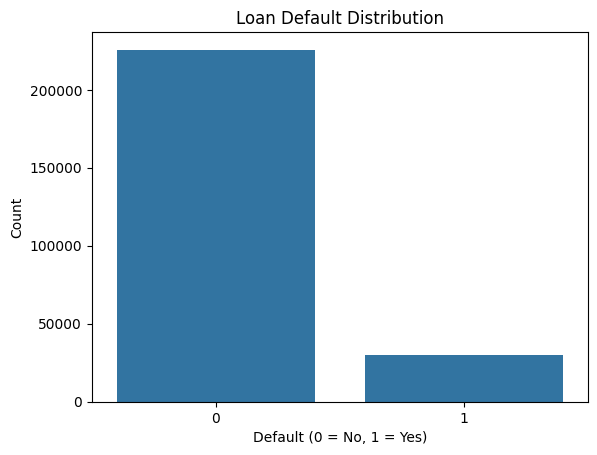

In [10]:
sns.countplot(data=df, x='Default')
plt.title('Loan Default Distribution')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

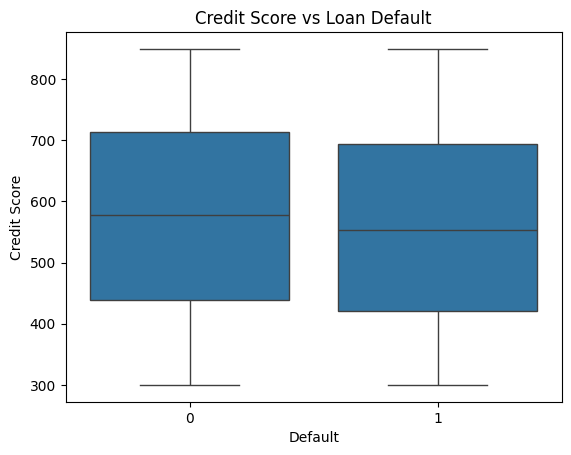

In [11]:
sns.boxplot(data=df, x='Default', y='CreditScore')
plt.title('Credit Score vs Loan Default')
plt.xlabel('Default')
plt.ylabel('Credit Score')
plt.show()


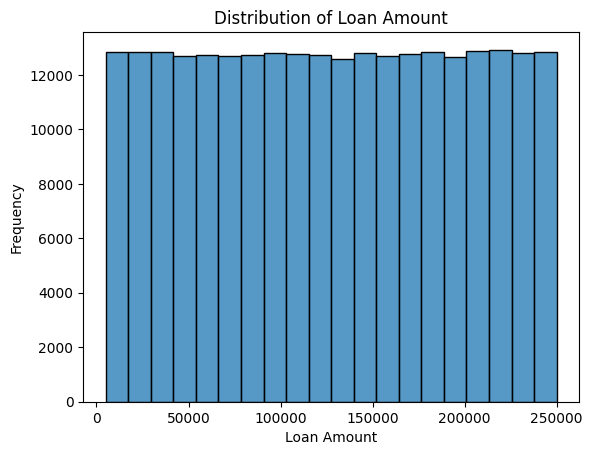

In [14]:
sns.histplot(data=df, x='LoanAmount', bins=20, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


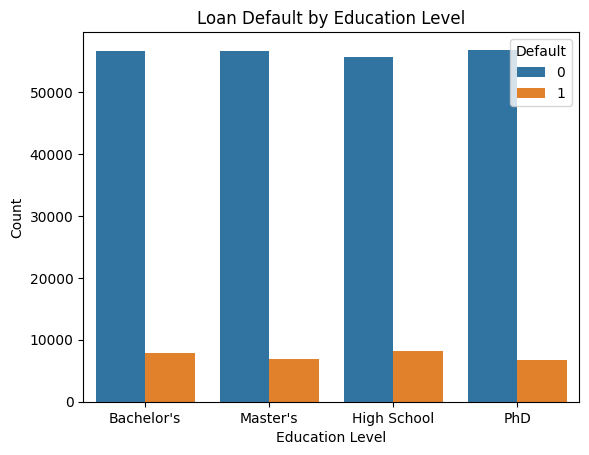

In [15]:
# Countplot for Education and Default
sns.countplot(data=df, x='Education', hue='Default')
plt.title('Loan Default by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


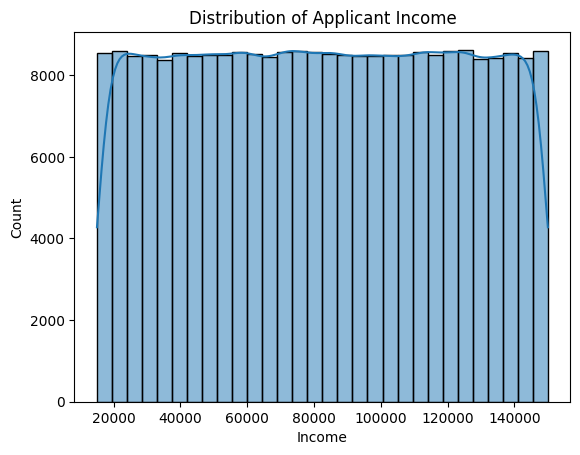

In [17]:
# Income distribution
sns.histplot(data=df, x='Income', bins=30, kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


In [28]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


X = df.drop('Default', axis=1)
y = df['Default']
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
        ('num', StandardScaler(), numeric_cols)  # 🔥 Scale numeric columns
    ]
)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000))  # Increased max_iter
])


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [46]:
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [42]:
y_pred = model.predict(X_test)

In [48]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.8850401409829646

📊 Confusion Matrix:
 [[45007   132]
 [ 5739   192]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.59      0.03      0.06      5931

    accuracy                           0.89     51070
   macro avg       0.74      0.51      0.50     51070
weighted avg       0.85      0.89      0.84     51070



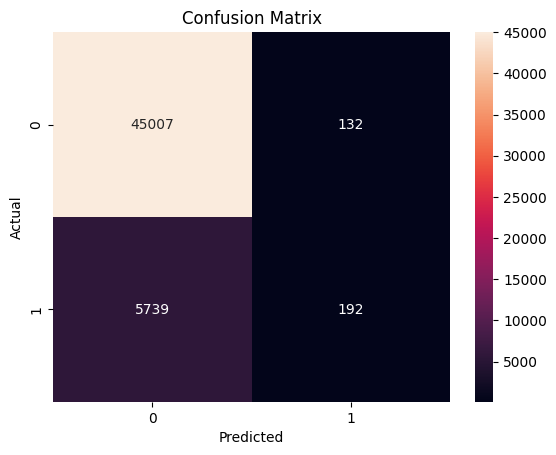

In [49]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()